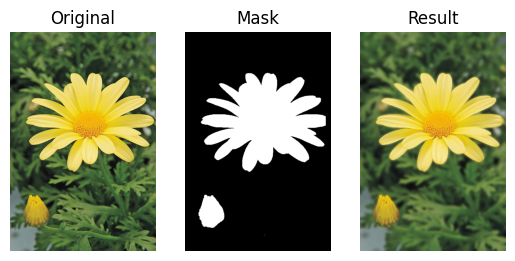

In [ ]:
import cv2, numpy as np, matplotlib.pyplot as plt

img = cv2.imread("daisy.jpg")
m = np.zeros(img.shape[:2], np.uint8)
rect = (20,20,img.shape[1]-40,img.shape[0]-40)
bg, fg = np.zeros((1,65),np.float64), np.zeros((1,65),np.float64)

cv2.grabCut(img, m, rect, bg, fg, 5, cv2.GC_INIT_WITH_RECT)
mask = np.where((m==2)|(m==0),0,1).astype("uint8")

blur = cv2.GaussianBlur(img,(25,25),0)
out = blur.copy(); out[mask==1] = img[mask==1]

plt.subplot(131);plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB));plt.title("Original");plt.axis("off")
plt.subplot(132);plt.imshow(mask,cmap="gray");plt.title("Mask");plt.axis("off")
plt.subplot(133);plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB));plt.title("Result");plt.axis("off")
plt.show()
